## Installations

In [3]:
!pip install pandas
!pip install scikit-plot

## Import Libraries

In [58]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
import scikitplot

from imblearn.over_sampling import SMOTE

## Read & Split csv file

In [2]:
email_texts = pd.read_csv("Spam Email raw text for NLP.csv")

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [15]:
train_email_texts, test_email_texts = train_test_split(email_texts, test_size=0.3, random_state=42)

train_email_texts.to_csv('train email texts.csv', index=False)
test_email_texts.to_csv("test email texts.csv", index=False) 

## Classification model train

In [17]:
#extract the text for both training and testing
X_train_text = train_email_texts["MESSAGE"]
X_test_text = test_email_texts["MESSAGE"]

#extract the category for both training and testing
Y_train = train_email_texts["CATEGORY"]
Y_test = test_email_texts["CATEGORY"]

## CountVectorizer

In [19]:
vectorizer_v1 = CountVectorizer(min_df=10, stop_words='english')
vectorizer_v1.fit(X_train_text)
X_train_v1 = vectorizer_v1.transform(X_train_text)
X_train_v1_dense=pd.DataFrame(X_train_v1.toarray(), columns=vectorizer_v1.get_feature_names_out())

<4057x6597 sparse matrix of type '<class 'numpy.int64'>'
	with 369272 stored elements in Compressed Sparse Row format>

In [46]:
models_list = list()

## Naive Bayes Model

In [47]:
nb_model = MultinomialNB() # A Naive Bayes Classifier.
nb_model.fit(X_train_v1_dense, Y_train)

models_list.append([nb_model, "nb_model"])

## Random Forest Model

In [48]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_v1_dense, Y_train)

models_list.append([rf_model, "rf_model"])

## Smote oversampling

In [49]:
sm = SMOTE(random_state=42)
X_train_v1_dense_sm, Y_train_sm = sm.fit_resample(X_train_v1_dense, Y_train)

## Naive Bayes Model with SMOTE oversampling

In [50]:
nb_smote_model = MultinomialNB() # A Naive Bayes Classifier.
nb_smote_model.fit(X_train_v1_dense_sm, Y_train_sm)

models_list.append([nb_smote_model, "nb_smote_model"])

## Random Forest Model with SMOTE oversampling

In [51]:
rf_smote_model = RandomForestClassifier()
rf_smote_model.fit(X_train_v1_dense_sm, Y_train_sm)

models_list.append([rf_smote_model, "rf_smote_model"])

## Predictions

In [61]:
class_names=['spam','non spam']

Accuracy Scores


C:\Users\anton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


nb_model -> 0.9223691776883266


C:\Users\anton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


rf_model -> 0.9815986198964922


C:\Users\anton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


nb_smote_model -> 0.9079930994824612


C:\Users\anton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


rf_smote_model -> 0.9764232317423807


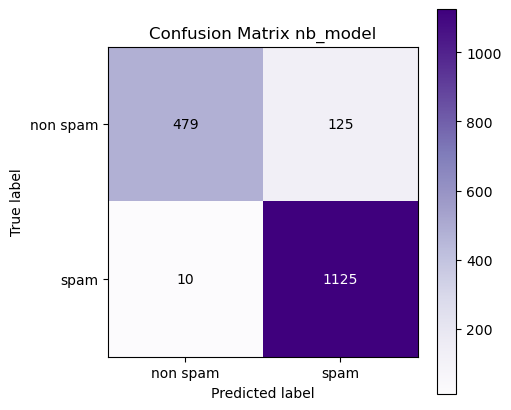

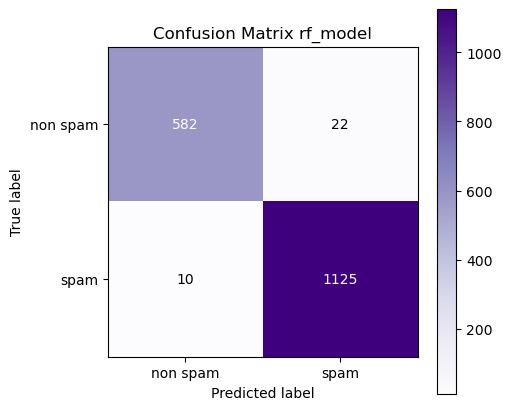

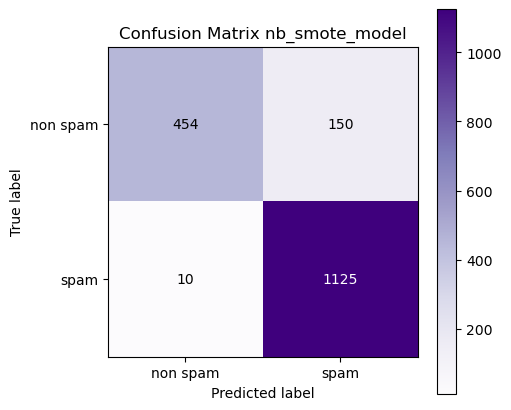

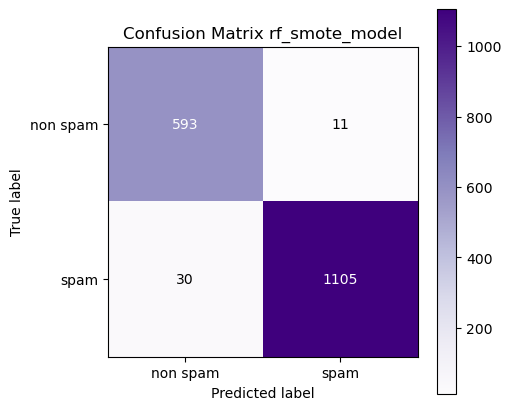

In [64]:
print("Accuracy Scores")
for model, model_name in models_list:
    prediction_pipeline_v1 = make_pipeline(vectorizer_v1, model)
    predictions_v1 = prediction_pipeline_v1.predict(X_test_text)
    acc = accuracy_score(Y_test, predictions_v1)
    print(model_name, "->", acc)
    
    scikitplot.metrics.plot_confusion_matrix([class_names[i] for i in Y_test], # actual labels
                                    [class_names[i] for i in predictions_v1], # predicted labels 
                                    title="Confusion Matrix " + model_name, # title to tuse 
                                    cmap="Purples", # color palette to use 
                                    figsize=(5,5) # figure size 
                                    )